<a href="https://colab.research.google.com/github/ChiomaO15/ChiomaO15/blob/main/Predicted_functions_of_hypothetical_proteins_in_Bacillus_amyloliquefaciens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gene Function Prediction for Bacillus Species using Machine Learning

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the data
file_path = '/content/Bacillus amyloliquefaciens Bacillusamyloliquefaciens.csv'  # Path to your CSV file
data = pd.read_csv(file_path)

# Check the first few rows to understand the data
print(data.head())

                           contig_id           feature_id type  \
0  NODE_1_length_43775_cov_49.908028  fig|1390.1141.peg.1  CDS   
1  NODE_1_length_43775_cov_49.908028  fig|1390.1141.peg.2  CDS   
2  NODE_1_length_43775_cov_49.908028  fig|1390.1141.peg.3  CDS   
3  NODE_1_length_43775_cov_49.908028  fig|1390.1141.peg.4  CDS   
4  NODE_2_length_41648_cov_96.217820  fig|1390.1141.peg.5  CDS   

                                        location  start   stop strand  \
0       NODE_1_length_43775_cov_49.908028_3+9453      3   9455      +   
1   NODE_1_length_43775_cov_49.908028_9473+10536   9473  20008      +   
2  NODE_1_length_43775_cov_49.908028_19998+16302  19998  36299      +   
3   NODE_1_length_43775_cov_49.908028_36313+7458  36313  43770      +   
4      NODE_2_length_41648_cov_96.217820_310-309    310      2      -   

                                            function  Unnamed: 8  \
0                        Modular polyketide synthase         NaN   
1                        Mod

In [3]:
# Step 1: Filter out proteins with 'hypothetical protein' function
known_function_data = data[data['function'] != 'hypothetical protein']
hypothetical_proteins = data[data['function'] == 'hypothetical protein']

In [4]:
# Step 2: Prepare the data for training
# Features (X) are all columns except 'function'
X_known = known_function_data.drop(columns=['function'])
y_known = known_function_data['function']

In [5]:
# Encode categorical features and the target (if necessary)
X_known_encoded = X_known.apply(LabelEncoder().fit_transform)  # Encode features
y_known_encoded = LabelEncoder().fit_transform(y_known)  # Encode the 'function' column


In [6]:
# Step 3: Split the known proteins data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_known_encoded, y_known_encoded, test_size=0.2, random_state=42)

In [7]:
# Step 4: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Step 5: Evaluate the model on the test set
y_pred = rf_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.027065527065527065
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          38       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [9]:
from sklearn.metrics import classification_report

# Assuming `y_test` is the true labels and `y_pred` is the predicted labels
report = classification_report(y_test, y_pred)

# Save to a text file
with open('classification_report.txt', 'w') as f:
    f.write(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [10]:
# Step 6: Predict the functions of the hypothetical proteins
# Prepare the features of hypothetical proteins
X_hypothetical = hypothetical_proteins.drop(columns=['function'])
X_hypothetical_encoded = X_hypothetical.apply(LabelEncoder().fit_transform)  # Encode features


In [11]:
# Predict the functions of hypothetical proteins
hypothetical_predictions = rf_model.predict(X_hypothetical_encoded)


In [12]:
# Decode the predicted labels back to the original function names
predicted_functions = LabelEncoder().fit(y_known).inverse_transform(hypothetical_predictions)


In [13]:
# Add the predictions to the hypothetical_proteins dataframe
hypothetical_proteins['predicted_function'] = predicted_functions

<ipython-input-13-d61b0bc31292>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypothetical_proteins['predicted_function'] = predicted_functions


In [14]:
# Print the predictions
print(hypothetical_proteins['predicted_function'])  # Adjust column names as necessary

76                                   GGDEF domain protein
110          DNA polymerase III beta subunit (EC 2.7.7.7)
120                    Alanine dehydrogenase (EC 1.4.1.1)
146      Cytochrome c oxidase polypeptide IV (EC 1.9.3.1)
230     Carbamoyl-phosphate synthase large chain (EC 6...
                              ...                        
4033    4-hydroxybenzoyl-CoA thioesterase family activ...
4034                              Niacin transporter NiaP
4035    4-hydroxybenzoyl-CoA thioesterase family activ...
4039    Galactose-1-phosphate uridylyltransferase (EC ...
4043    PTS system, glucose-specific IIA component (EC...
Name: predicted_function, Length: 539, dtype: object


# Visualizing predicted functions

<ipython-input-15-cfd0f5030470>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_predicted_functions.index, y=top_20_predicted_functions.values, palette='viridis')


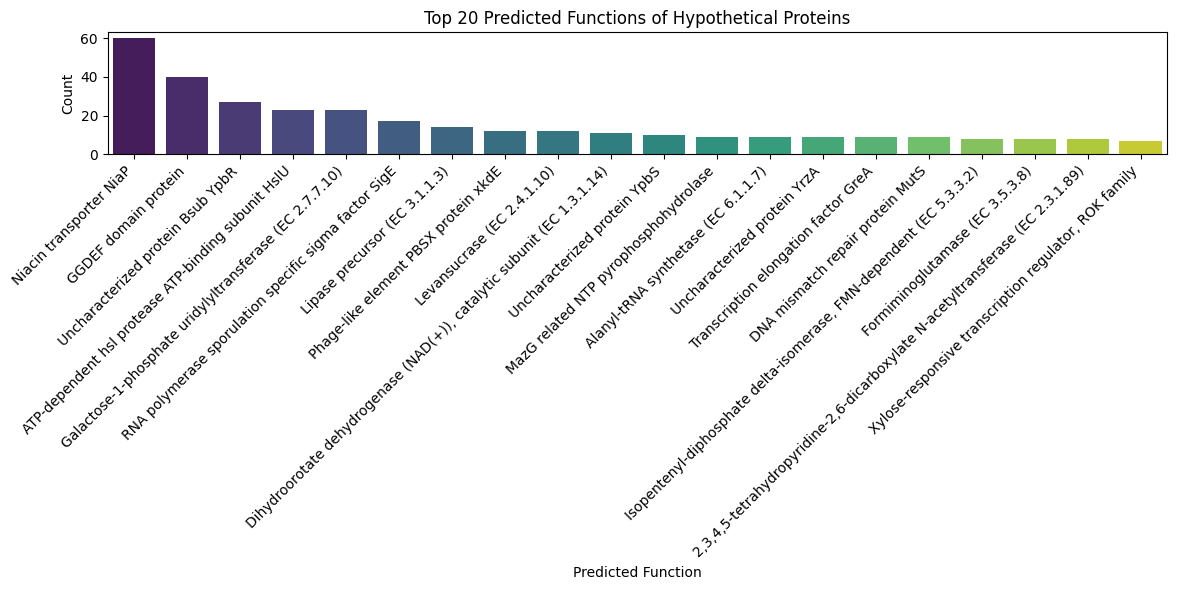

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 7: Visualize the top 20 predicted functions of the hypothetical proteins
# Count the occurrences of each predicted function
predicted_function_counts = hypothetical_proteins['predicted_function'].value_counts()

# Select the top 20 most common predicted functions
top_20_predicted_functions = predicted_function_counts.head(20)

# Create a bar plot of the top 20 predicted functions
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_predicted_functions.index, y=top_20_predicted_functions.values, palette='viridis')

# Add labels and title
plt.xlabel('Predicted Function')
plt.ylabel('Count')
plt.title('Top 20 Predicted Functions of Hypothetical Proteins')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()